# Coursera - Clean and analyze social media usage data with Python

### Summary

   For the project on Coursera website (https://www.coursera.org/learn/analyze-social-media-python/home/welcome), I'm taking a (supposed) role for a social media marketing company that specializes in promoting brands and products on a popular social media platform, and help them to automatically extract tweets posted from one or more categories, and to clean, analyze and visualize the data. 

Projects objectives are:
1. Increase client reach and engagement
2. Gain valuable insights that will help improve social media performance
3. Achieve their social media goals and provide data-driven recommendations

### Introduction

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

random.seed(0)

sns.set_style("whitegrid")
%matplotlib inline

In the given tasks it is said to define list of categories, and then generate Python data dictionary with fields Date, Category, and number of likes, all with random data.

In [17]:
categories = ['Food', 'Travel', 'Music', 'Sports', 'News', 'Politics', 'Fashion', 'Art', 'Science', 'Technology']
data = {'Date': pd.date_range('2021-01-01', periods=500),
        'Category': [random.choice(categories) for _ in range(500)],
        'Likes': np.random.randint(0, 10000, size=500)}

To ensure the accuracy and validity of the analysis, NaN values and duplicates are removed from the dataset. This process allows for working with a clean and reliable dataset, free from missing data and duplicated observations.

In [18]:
df = pd.DataFrame(data)

df.dropna(inplace=True)
df.drop_duplicates(inplace = True)
df['Date'] = pd.to_datetime(df['Date'])
df['Likes'] = df['Likes'].astype(int)

### Data Exploration

In this section, the dataset will be explored using various functions and graphs. By grouping the data with the 'describe' function, we can obtain descriptive statistics for each category, providing valuable insights into the dataset.

In [19]:
df.head()

,Date,Category,Likes
0,2021-01-01,Fashion,5011
1,2021-01-02,Fashion,2750
2,2021-01-03,Food,2920
3,2021-01-04,News,7342
4,2021-01-05,Science,8557


In [20]:
df.tail()

,Date,Category,Likes
495,2022-05-11,Travel,1166
496,2022-05-12,Art,2144
497,2022-05-13,News,4859
498,2022-05-14,News,2833
499,2022-05-15,Fashion,6921


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 13.7+ KB


In [22]:
df.describe()

,Likes
count,500.000000
mean,5266.732000
std,2776.693341
min,68.000000
25%,2876.750000
50%,5350.000000
75%,7675.500000
max,9978.000000


In [23]:
df['Likes'].mean()

5266.732

In [24]:
df['Likes'].groupby(df['Category']).mean()

Category
Art           5047.000000
Fashion       5633.260870
Food          5032.653846
Music         5224.333333
News          5425.450980
Politics      5147.770833
Science       5801.872340
Sports        5021.673913
Technology    5526.000000
Travel        4907.419355
Name: Likes, dtype: float64

In [25]:
df['Likes'].groupby(df['Category']).describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Art,49.0,5047.000000,2799.653676,110.0,2690.00,5270.0,7116.00,9745.0
Fashion,46.0,5633.260870,2526.881507,174.0,3905.50,5926.5,7386.75,9846.0
Food,52.0,5032.653846,2958.039049,109.0,2888.75,3855.0,8348.50,9934.0
Music,45.0,5224.333333,2782.603286,159.0,2563.00,5394.0,7446.00,9978.0
News,51.0,5425.450980,2811.051642,306.0,3634.50,5267.0,7640.00,9657.0
Politics,48.0,5147.770833,3001.384406,68.0,2737.75,5378.0,7584.50,9768.0
Science,47.0,5801.872340,2887.693239,260.0,3217.50,6287.0,8362.50,9903.0
Sports,46.0,5021.673913,2762.895076,449.0,2633.75,4596.5,7031.25,9705.0
Technology,54.0,5526.000000,2621.230872,581.0,3526.75,5328.5,7865.00,9674.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Likes Distribution'}, xlabel='Likes', ylabel='Density'>

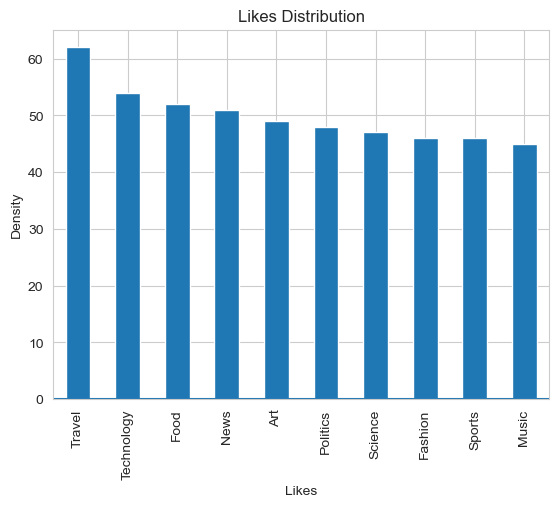

In [26]:
plt.title('Likes Distribution')
sns.distplot(df['Likes'])
df['Category'].value_counts().plot(kind='bar')

The graph shown illustrates the number of posts in each category. The chart shows that the most frequent posts are from the Travel category with a clear advantage over other categories. The rarest posts are those for, in order from the end "Music," "Sports," and "Fashion."

<AxesSubplot:title={'center':'Likes Distribution(count)'}, xlabel='Likes', ylabel='Count'>

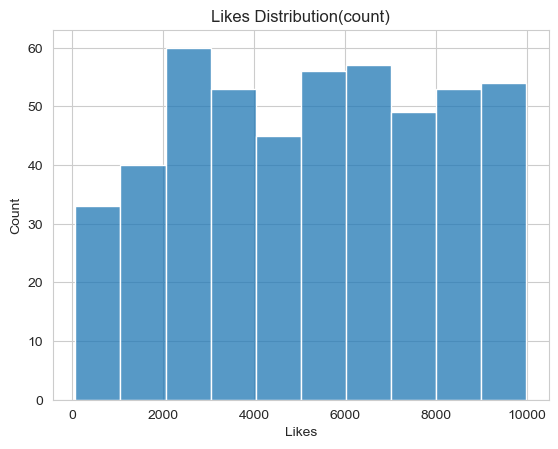

In [32]:
plt.title('Likes Distribution(count)')
sns.histplot(data=df, x='Likes')

The histogram reveals a relatively symmetrical distribution of likes, indicating no pronounced skewness to the left or right. However, the distribution does not exhibit a clear central tendency, as there is no distinct peak or highest point observed. The spread of the likes distribution appears to be relatively low overall, with the exception of the range of likes from 0 to 2000, which shows lower counts compared to the other ranges. This suggests that most likes in the dataset are evenly distributed across various ranges, with a notable decrease in counts for likes in the lower range of 0 to 2000.

<AxesSubplot:title={'center':'Likes Variation Across Categories'}, xlabel='Category', ylabel='Likes'>

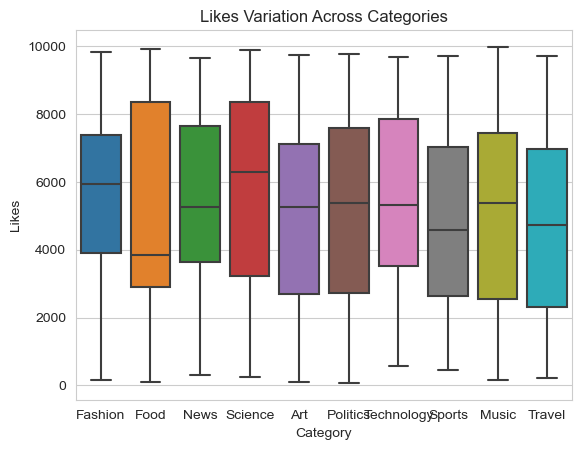

In [28]:
plt.title("Likes Variation Across Categories")
sns.boxplot(data=df, x='Category', y='Likes')

The boxplot reveals that most categories have similar maximum and minimum values, as well as median values. However, two categories, namely 'Food' and 'Science,' exhibit notable differences. In the 'Food' category, the median value is the lowest among all categories, and the third quartile (centile 3) shows the largest range, spanning from 4,000 to over 8,000. On the other hand, the 'Science' category has the highest median value, indicating a higher average number of likes. Additionally, the 'Science' category has higher values for the second and third quartiles compared to other categories.

The 'Fashion' category stands out as an outlier. It exhibits a relatively 'shorter half' in terms of likes. This is evident as the second quartile (centile 2) for 'Fashion' starts at a higher value compared to the rest of the categories, while the third quartile (centile 3) ends at a lower value. In other words, the 'Fashion' category tends to have a lower range of likes compared to the other categories. This suggests that posts related to fashion may generally receive lower levels of engagement or fewer likes compared to posts in other categories.

<AxesSubplot:title={'center':'Likes Variation Across Categories'}, xlabel='Category', ylabel='Likes'>

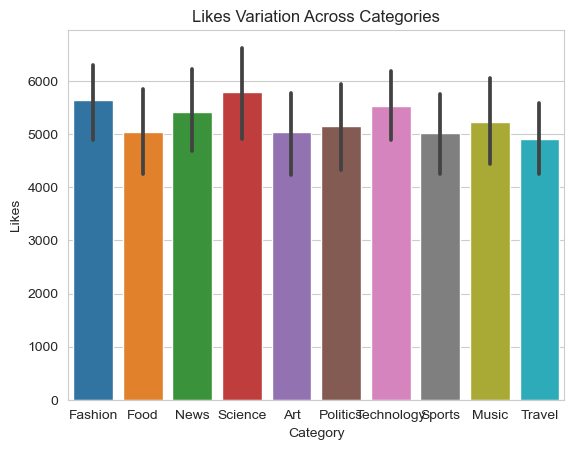

In [31]:
plt.title("Likes Variation Across Categories")
sns.barplot(data=df, x='Category', y='Likes')

The lowest average value is characterised by the "travel" category
(less than 5000 "Likes"), and "Food", "Art", and "Sports" (5000 likes).
The category with the highest average is "Science" with a high error (plus and minus one
standard deviation value). Other categories with a high average are 'Fashion' and 'Technology'.

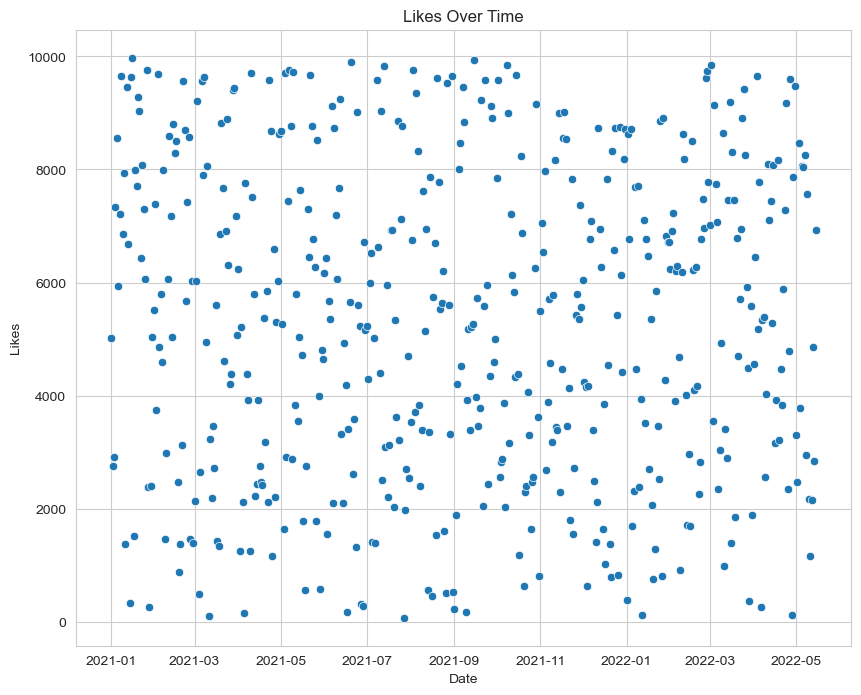

In [30]:
plt.figure(figsize=(10, 8))
grouped_df = df.groupby('Date')['Likes'].sum().reset_index()
sns.scatterplot(data=grouped_df, x='Date', y='Likes')
plt.title("Likes Over Time")
plt.show()

To examine the potential correlation between time and the number of likes, a scatterplot will be utilized. The initial observation from the graph suggests the absence of a clear trend between the variables. However, to confirm this observation, further steps will involve grouping the data by dates, normalizing the values, and conducting statistical tests.

### Conclusions

The dataset included information on likes and categories, and various descriptive statistical techniques were employed. The analysis revealed that the "Travel" category had the highest frequency of posts, indicating its popularity among users. The scatterplot showed no clear correlation between time and likes, suggesting that the timing of posts may not significantly impact engagement. The boxplot highlighted variations in likes across different categories, with the "Fashion" category standing out as an exception with lower average likes. Additionally, the 'Science' category demonstrated the highest average likes, suggesting a strong interest in scientific content among the audience, moreover it was proven in the barplot. Overall, this project provided valuable insights into social media engagement and category-wise popularity, facilitating a better understanding of user preferences and behavior.

Recommendations for the company:
1. Capitalize on the popularity of the 'Travel' category: Since the "Travel" category exhibited the highest frequency of posts and potentially higher engagement levels, the company could focus on creating more content related to travel.
2. Focus on "Science" category, which demonstrated highest average of "Likes" amongst categories.
3. Avoid or limit postings, which indicates categories such as "Fashion", "Art", "Sports".
4. Consider the timing of posts: Although the scatterplot analysis did not reveal a clear correlation between time and likes, it's still important to experiment with different posting times to identify potential patterns or optimize engagement.

Further plans to improve the analysis:
1. Add section of inferential statistics to extend findings to a larger population;
2. Time-series analyzing, checking further if correlation between "Likes" and time is indeed absent;
3. Building predictive model for the data.